**Author : Nilanjan Dey**<br>
**Student ID : 210700851**

In [68]:
import librosa
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#%matplotlib inline
#import os
#from PIL import Image
#import pathlib
#import csv 
import sklearn
from sklearn import preprocessing
import librosa.display
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
#from sklearn.preprocessing import keras
from keras import layers
#from keras import layers
#import keras
from keras.models import Sequential 
#from keras.models import warnings
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [69]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



#**Using Sounds dataset, building a machine learning pipeline that takes as an input an audio segment and predicts whether the audio segment has been recorded indoors or outdoors.**

In [5]:
path = '/content/drive/MyDrive/Data/MLEndLS'
os.listdir(path)

['MLEndLS_1 2.zip',
 'MLEndLS_2.zip',
 'MLEndLS_3.zip',
 'MLEndLS_data.zip',
 'MLEndLS_Sample.zip',
 'MLEndLS 2.csv']

unzipping the sample data:

In [91]:
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndLS/newfolder/'
zip_path = '/content/drive/MyDrive/Data/MLEndLS/MLEndLS_data.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)



Checking total number of Audio File

In [96]:
sample_path = '/content/drive/MyDrive/Data/MLEndLS/newfolder/MLEndLS_1/*.wav'
files = glob.glob(sample_path)
len(files)

2494

In [97]:
for _ in range(3):
  n = np.random.randint(58)
  display(ipd.Audio(files[n]))



The MLEndLS Dataset contains 5 attributes:
- Audio
- Area
- Spot
- Whether indoor or outdoor
- Participant


In [98]:
MLENDLS_df = pd.read_csv('/content/drive/MyDrive/Data/MLEndLS/MLEndLS 2.csv').set_index('file_id') 
MLENDLS_df

area       spot   in_out Participant
file_id                                             
0001.wav     british     street  outdoor        S151
0002.wav  kensington   dinosaur   indoor        S127
0003.wav      campus     square  outdoor         S18
0004.wav  kensington     hintze   indoor        S179
0005.wav      campus     square  outdoor        S176
...              ...        ...      ...         ...
2496.wav     westend  trafalgar  outdoor        S151
2497.wav      campus     square  outdoor          S6
2498.wav     westend   national   indoor         S96
2499.wav     british     room12   indoor         S73
2500.wav     british     room12   indoor         S58

[2500 rows x 4 columns]

#Machine Learning Product Pipeline


1.   Download/Upload Dataset
2.   upload the metadata
3.   Feature Extraction(Amp, Waveleangth, MFCC, Zero Crossing)
4.   Analysing and Preprossesing Features using FFT
5.   Split the data for training and test data
6.   Prepare training data
7.   Build Model
8.   Train model
9.   Interferance


**Input(x): Audio File and Output(y) will be trageted label In_out which predicts indoor or outdoor sound**





In [99]:
for file in files:
  print(file.split('/')[-1])

2217.wav
0400.wav
0366.wav
1078.wav
0372.wav
0414.wav
1722.wav
1044.wav
1050.wav
1736.wav
0428.wav
1905.wav
1911.wav
1939.wav
1087.wav
0399.wav
1093.wav
0164.wav
0602.wav
2015.wav
2001.wav
0616.wav
1508.wav
0170.wav
1246.wav
0158.wav
2029.wav
1520.wav
1534.wav
1252.wav
0819.wav
1285.wav
0825.wav
0831.wav
1291.wav
0010.wav
1468.wav
0776.wav
2161.wav
2175.wav
0762.wav
0004.wav
1332.wav
0992.wav
1454.wav
0986.wav
1440.wav
2149.wav
0038.wav
1326.wav
0979.wav
0789.wav
0951.wav
1497.wav
0945.wav
1483.wav
2363.wav
0574.wav
0212.wav
2405.wav
2411.wav
1118.wav
0206.wav
0560.wav
2377.wav
0548.wav
1656.wav
2439.wav
1130.wav
1124.wav
1642.wav
1871.wav
1865.wav
1695.wav
1681.wav
1859.wav
2388.wav
2389.wav
1858.wav
1680.wav
1694.wav
1864.wav
1870.wav
1125.wav
1643.wav
1657.wav
0549.wav
1131.wav
2438.wav
0207.wav
1119.wav
2410.wav
2376.wav
0561.wav
0575.wav
2362.wav
2404.wav
0213.wav
1482.wav
0944.wav
1496.wav
0950.wav
0788.wav
0978.wav
2148.wav
1441.wav
0987.wav
1327.wav
0039.wav
1333.wav
1455.wav
0

# Feature extraction : Picth, mfcc, zero crossing, amp, freq

Audio files are complex data types. Specifically they are **discrete signals** or **time series**, consisting of values on a 1D temporal grid. These values are known as *samples* themselves, which might be a bit confusing, as we have used this term to refer to the *items* in our dataset. The **sampling frequency** is the rate at which samples in an audio file are produced. For instance a sampling frequency of 5HZ indicates that 5 produce 5 samples per second, or 1 sample every 0.2 s.

Let's plot one of our audio signals:

In [100]:
pip install SpeechRecognition


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Transformation Stage
Used different feature extractions to understand and analys the data
- MFCC(The great advantage of MFCCs  is that they approximate the human auditory system and attempt to model the way we perceive frequency.MFCC vector specify a number of different coefficients usually in our data to use between 13 and 39 coefficients. Also I tried for speech to text for one audio data for which mfcc was required.)
- Zero-Crossing Rate(Calculating the number of zero-crossings in a signal segment is a straightforward method for determining its smoothness. A voice signal oscillates slowly, crossing zero 100 times per second, whereas an unvoiced fricative may cross zero 3000 times per second.It typically has higher values for sounds with a lot of percussion, like traffic noise. Presently let us picture it and perceive how we ascertain zero intersection rate.)
- Spectrogram STFT(A spectrogram is a visual way to show the signal's "loudness," or strength, over time at different frequencies in a particular waveform. USed see not only whether there is more or less energy at. USed short term Fourier transform (stft()) to transform data. By converting signals, STFT makes it possible to determine the amplitude of a given frequency at a given time. The amplitude of various frequencies that are playing simultaneously in an audio signal can be determined with the help of STFT.)

In [101]:
import speech_recognition as sr


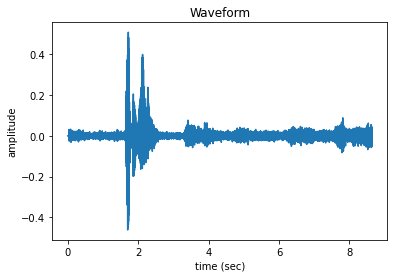

<Figure size 1440x360 with 0 Axes>

result2:
{   'alternative': [{'confidence': 0.98762912, 'transcript': 'this is London'}],
    'final': True}
this is London


In [102]:
for num in range(10):
 fs = 22050 # Sampling frequency
 x, fs = librosa.load(files[num],sr=fs)
 time = np.arange(len(x))/fs
plt.plot(time,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.title('Waveform')
plt.savefig('waveform.png', dpi=100)
plt.figure(figsize=(20, 5))
plt.show()
display(ipd.Audio(files[num]))
r = sr.Recognizer()
with sr.AudioFile(files[num]) as source:
    # listen for the data (load audio to memory)
    audio_data = r.record(source)
    # recognize (convert from speech to text)
    text = r.recognize_google(audio_data)
    print(text)

#Dataset and data visualisation
Everything we need to know about sound. When an object vibrates, it causes an oscillation of air molecules, which in turn causes an alternation of air pressure, resulting in a wave of high pressure alternated with low pressure.a few important terms in audio processing.
Amplitude is the perceived loudness, frequency is the perceived pitch, and sample rate is the number of times a sample is taken from a sound file.


It's FFT special power spectrum here was a snapshot of all the elements which concur to form this sound. Basically, what this spectrum is telling us is that these different frequencies have different powers but throughout all of them all of the sound here so it's a snapshot it's a static which could be seen as a problem because obviously audio data alike is a time series right so things change in time and so we want to know how things change in time and it seems that with the Fourier transform we can.

In [103]:
# perform Fourier transform
fft = np.fft.fft(x)
# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)
# create frequency variable
f = np.linspace(0, fs, len(spectrum))
# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]
# plot spectrum
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Power spectrum')
plt.savefig('FFT.png')
plt.show()

STFT hop length duration is:0.023219954648526078s
STFT window duration is: 0.09287981859410431s


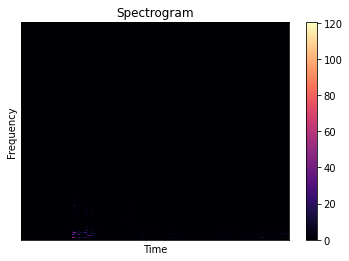

In [104]:
#STFT -spectrogram
hop_len = 512 # number of samples
num_fft = 2048 # window in number of samples
# calculate duration hop length and window in seconds
hop_length_dur = float(hop_len)/fs
n_fft_dur = float(num_fft)/fs
print('STFT hop length duration is:{}s'.format(hop_length_dur))
print('STFT window duration is: {}s'.format(n_fft_dur)
# perform stft
stft = librosa.stft(x, n_fft=num_fft, hop_len=hop_len)
# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)
# display spectrogram
librosa.display.specshow(spectrogram, sr=fs, hop_len=hop_len)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.title('Spectrogram')
plt.savefig('spectogram.png')
plt.show()

Fast Fourier transforms performed is equal to the size of the Fast Fourier transform divided by the overlap factor (where window duration is 0.092 which indicates that the signal length is really short and quick).

In [53]:
# applying logarithm and casting amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)
plt.figure(figsize=(8,4), dpi=100)
librosa.display.specshow(log_spectrogram, sr=fs,
hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (dB)')
plt.savefig('spectogram_log.png')
plt.show()

The horizontal axis displays the time duration, while the vertical axis displays frequencies. We can change the frequency axis to a logarithmic one because we can see that everything happens at the bottom of the spectrum.

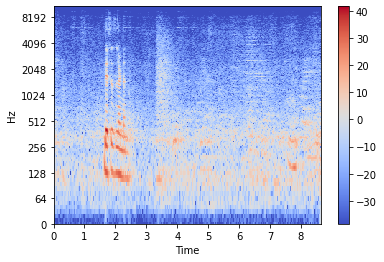

In [54]:
librosa.display.specshow(log_spectrogram, sr=fs, x_axis='time', y_axis='log')
plt.colorbar()

In [56]:
#mfcc
mfccs = librosa.feature.mfcc(x, fs, n_fft=n_fft,
hop_length=hop_length, n_mfcc=13)
# displaying mfcc
librosa.display.specshow(mfccs, sr=fs,
hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('MFCC coefficients')
plt.colorbar()
plt.title('MFCCs')
plt.savefig('mfcc.png')
plt.show()

Thus, I have 13 MFCC coefficients plotted on the y-axis, time on the x-axis, and the reder the axis, the higher the coefficient's value during that time period.

In [107]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

In [108]:
MLENDLS_df.loc[files[n].split('/')[-1]]

area           british
spot            room12
in_out          indoor
Participant       S104
Name: 1736.wav, dtype: object

It typically has higher values for sounds with a lot of percussion, traffic in our case.Presently let us picture it and perceive how we ascertain zero intersection rate.

In [57]:
n=0
x, fs = librosa.load(files[n],sr=fs)
print('This audio signal has', len(x), 'samples')
num0 = 9000
num1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[num0:num1])
plt.grid()


This audio signal has 163170 samples


In [58]:
zero_cross = librosa.zero_crossings(x[n0:n1], pad=False)
zero_cross.shape


(100,)

In [59]:
print(sum(zero_cross))
zcrs = librosa.feature.zero_crossing_rate(x)
print(zcrs.shape)


6
(1, 319)


It shows that that the traffic noises are not as much as it was expected as only 6 zero crossing data has come

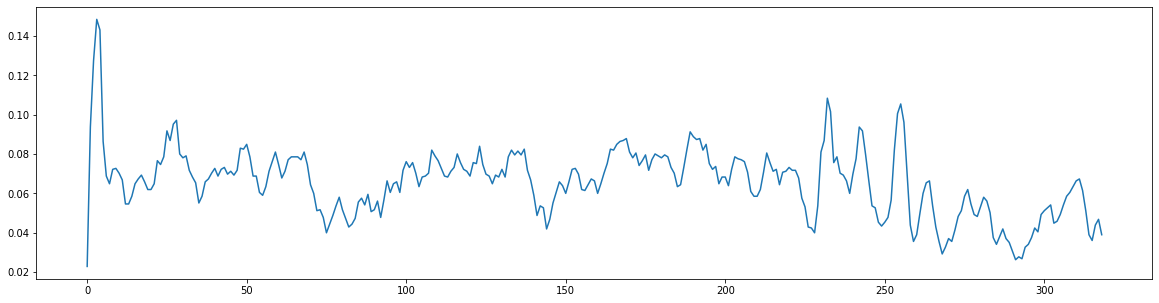

In [61]:
plt.figure(figsize=(20, 5))
plt.plot(zcrs[0])

In [51]:
spectral_cen = librosa.feature.spectral_centroid(x, sr=fs)[0]
spectral_cen.shape

(319,)

In [115]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


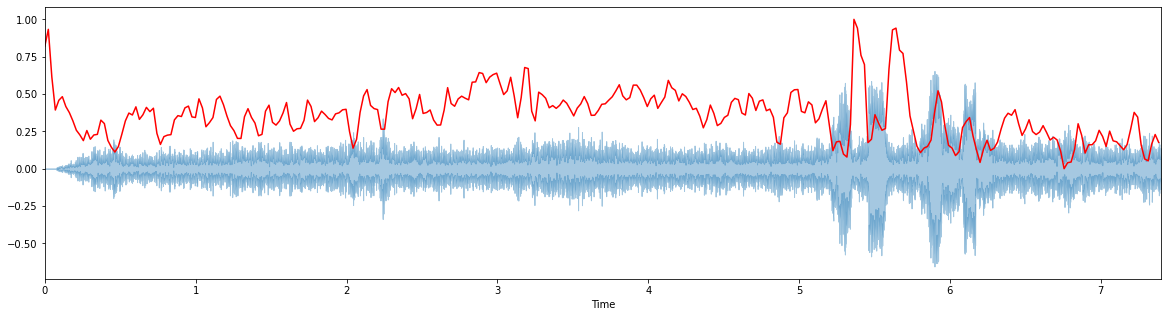

In [63]:

#time variable for visualization
plt.figure(figsize=(20,5))
frame = range(len(spectral_centroids))
time = librosa.frames_to_time(frame)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=fs, alpha=0.4)
plt.plot(time, normalize(spectral_centroids), color='r')

preprocessing spectral centroid feature with minmax scale.
After scaling we can see that the red which is feature data but normalised with frequency which also represents scaling of noise in the bacground with frequency time.

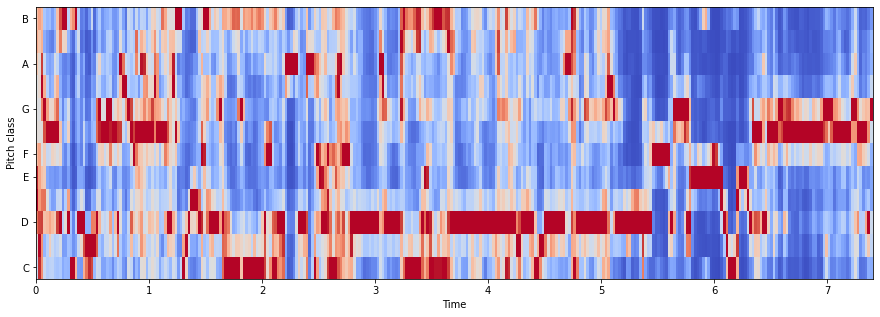

In [64]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=fs, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

This chromagram represents how audio features (energy of each pitch)
It gives a robust way to describe a similarity measure between traffic and indoor sound places. dark red resemblace the similarity of sound from data with time.

In [65]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

Consider the issue of deciding whether the location for filming is indoors or outdoors. The next cell defines a function that takes a CSV file and a collection of audio files and creates a NumPy array with the four audio features used as predictors (X) and a binary label (y) that tells whether the recording is indoors (y=1 or outdoor) or outdoors (y=0).

In [66]:
MLENDLS_df['area'] = MLENDLS_df['area'].astype("category")
MLENDLS_df['area_encoded'] = MLENDLS_df['area'].cat.codes
MLENDLS_df['area'].unique()
MLENDLS_df.head()

area      spot   in_out Participant  area_encoded
file_id                                                          
0001.wav     british    street  outdoor        S151             1
0002.wav  kensington  dinosaur   indoor        S127             3
0003.wav      campus    square  outdoor         S18             2
0004.wav  kensington    hintze   indoor        S179             3
0005.wav      campus    square  outdoor        S176             2

In [141]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = labels_file.loc[fileID]['in_out']=='indoor'
    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)

    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

    ampl = librosa.amplitude_to_db(x)
    amp_mean = np.nanmean(ampl) if np.mean(np.isnan(ampl))<1 else 0
    amp_std  = np.nanstd(ampl) if np.mean(np.isnan(ampl))<1 else 0

    zcr1 = librosa.zero_crossings(x)
    zcr_mean = np.nanmean(zcr1) if np.mean(np.isnan(zcr1))<1 else 0
    zcr_std  = np.nanstd(zcr1) if np.mean(np.isnan(zcr1))<1 else 0

    sro1 = librosa.feature.spectral_rolloff(x, sr=fs)
    sro_mean = np.nanmean(sro1) if np.mean(np.isnan(sro1))<1 else 0
    sro_std  = np.nanstd(sro1) if np.mean(np.isnan(sro1))<1 else 0

    mfccs1 = librosa.feature.mfcc(x, sr=fs)
    mfccs_mean = np.nanmean(mfccs1) if np.mean(np.isnan(mfccs1))<1 else 0
    mfccs_std  = np.nanstd(mfccs1) if np.mean(np.isnan(mfccs1))<1 else 0
    
    xi = [power,pitch_mean,pitch_std,voiced_fr, zcr_mean, amp_mean, amp_std, sro_mean, sro_std, mfccs_mean, mfccs_std]
    X.append(xi)
    y.append(yi)
  return np.array(X),np.array(y)

Applying "getXy" to the subsample will yield a binary label (y) and the NumPy predictor array (X). Due to the fact that we are processing each audio signal, this may take some time.

In [142]:
X,y = getXy(files, labels_file=MLENDLS_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 2494/2494 [1:08:30<00:00,  1.65s/it]


shape of x and y

In [143]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)


The shape of X is (2494, 11)
The shape of y is (2494,)
The labels vector is [False False  True ...  True False False]


In [144]:
print(' The number of indoor recordings is ', np.count_nonzero(y))
print(' The number of outdoor recordings is ', y.size - np.count_nonzero(y))

 The number of indoor recordings is  1179
 The number of outdoor recordings is  1315


# Modeling: ANN model

Building ANN model because algorithms for modeling complex patterns and solving prediction problems can be developed using Artificial Neural Network (ANN) algorithms, which are based on the brain's processing to predict indoor and outdoor using audio.

so the next will learn from the previous neuron to understand the features and indoor ourdoor prediction

In [145]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1870, 11), (624, 11), (1870,), (624,))

In [147]:
## Trianing my model

In [148]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train)
model.summary()



59/59 [==============================] - 2s 7ms/step - loss: 11.0890 - accuracy: 0.4813
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               3072      
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 44,874
Trainable params: 44,874
Non-trainable params: 0
_________________________________________________________________
0.49732619524002075


#Methodology
The processing of the encephalon serves as the foundation for Artificial Neural Network (ANN) algorithms that can be used to model intricate patterns and anticipate problems.
First things first, let's look at how our encephalon processes information:
Our encephalon is made up of billions of neurons, which process electric signals to process information. The neuron's dendrites take in external stimuli, process them in the cell body, turn them into an output, and send them on to the next neuron via axon. The following neuron can select to either acknowledge it or reject it relying upon the life of the sign.
In our Data the extracted audio features are trained with respected to labelled data from metadata now it is classified into categogry and is closely to 1 mostly it is Outdoor otherwise Indoor. Trained neuron will help the new neuron to get trained and learn and therefore it will predict.



**The accuracy is coming as 62 % for training dataset and 60 % for test dataset**

In [149]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

n_epochs = 100
n_batch_size = 180
c_pointer = ModelCheckpoint(sample_path, 
                               verbose=1, save_best_only=True)
start = datetime.now()
model.fit(X_train, y_train, batch_size=n_batch_size, epochs=n_epochs, validation_data=(X_val, y_val), callbacks=[c_pointer], verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
11/11 [==============================] - ETA: 0s - loss: 3.9931 - accuracy: 0.5139
Epoch 1: val_loss improved from inf to 10.87711, saving model to /content/drive/MyDrive/Data/MLEndLS/newfolder/MLEndLS_1/*.wav
11/11 [==============================] - 3s 295ms/step - loss: 3.9931 - accuracy: 0.5139 - val_loss: 10.8771 - val_accuracy: 0.5657
Epoch 2/100
 9/11 [=======================>......] - ETA: 0s - loss: 14.7311 - accuracy: 0.4759
Epoch 2: val_loss improved from 10.87711 to 6.85704, saving model to /content/drive/MyDrive/Data/MLEndLS/newfolder/MLEndLS_1/*.wav
11/11 [==============================] - 1s 110ms/step - loss: 13.4916 - accuracy: 0.4866 - val_loss: 6.8570 - val_accuracy: 0.4760
Epoch 3/100
 9/11 [=======================>......] - ETA: 0s - loss: 4.9187 - accuracy: 0.5722
Epoch 3: val_loss improved from 6.85704 to 4.21435, saving model to /content/drive/MyDrive/Data/MLEndLS/newfolder/MLEndLS_1/*.wav
11/11 [==============================] - 1s 112ms/step - loss:

#Result

we can see that the prection accuracy of both training and test data set is almost same which are 62.673 % and 60.009 % respectively which also shows that training dataset is negligibly overfit.

the base model was coming as 55 % using basic features and without preprocessing features using regresssion model but using ANN model it fits properly without overfitting.

using svm model it over fits alot with huge number which i have represented below therefore i rejected those model and only accepted ANN model with 62 and 60 accuracy.
#Accepted ANN MOdel as it fits properly

In [150]:
test_accuracy=model.evaluate(X_val,y_val,verbose=0)
print(test_accuracy[1])

0.6009615659713745


In [151]:
train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(train_accuracy[1])

0.6267379522323608


In [152]:
predict_x=model.predict(X_val) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

20/20 [==============================] - 0s 2ms/step
[0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1
 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0
 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0
 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 

In [67]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=128)

Epoch 1/10
15/15 [==============================] - 0s 4ms/step - loss: 2.0166 - accuracy: 0.3075
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 1.6571 - accuracy: 0.3829
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 1.5406 - accuracy: 0.3957
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 1.5031 - accuracy: 0.3963
Epoch 5/10
15/15 [==============================] - 0s 5ms/step - loss: 1.4790 - accuracy: 0.4080
Epoch 6/10
15/15 [==============================] - 0s 6ms/step - loss: 1.4602 - accuracy: 0.4160
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 1.4435 - accuracy: 0.4246
Epoch 8/10
15/15 [==============================] - 0s 6ms/step - loss: 1.4311 - accuracy: 0.4283
Epoch 9/10
15/15 [==============================] - 0s 5ms/step - loss: 1.4158 - accuracy: 0.4273
Epoch 10/10
15/15 [==============================] - 0s 5ms/step - loss: 1.3968 - accuracy: 0.4342


In [154]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1870, 11), (624, 11), (1870,), (624,))

Can you identify the number of items in the training and validation sets?

Let's now fit an SVM model and print both the training accuracty and validation accuracy.


In [155]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train,y_train)
prediction_val = xgb_classifier.predict(X_val)
prediction_train= xgb_classifier.predict(X_train)

print('prediction_val',accuracy_score(y_val,prediction_val))
print('prediction_train',accuracy_score(y_train,prediction_train))

prediction_val 0.7644230769230769
prediction_train 0.8374331550802139


In [156]:
model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.5775401069518716
Validation  Accuracy 0.6137820512820513
The support vectors are (1708, 11)


The training and validation accuracies in our model overfitting, underfitting, not performing well.

By using regulation also this didnt improve much therefor I rejected this model and extremely overfitting and imformation leakage where the model has feed info which is failing in test.
#Rejected SVM and XGboost as it is overfitting

In [157]:
mean = X_train.mean(0)
sd =  X_train.std(0)

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.9919786096256684
Validation  Accuracy 0.6362179487179487
The support vectors are (1825, 11)


#Conclusion

I have seen a straightforward Python pipeline for working with sound data in this project.Now I know how to convert audio file data to a NumPy array. Additionally, we have seen how to begin working with ANN to construct a audio classification model from this data.
I did a pretty good analysis of audio data with negligle overfitting of data with 62% accuracy.